***
# Starting Kit - Black Swan HiggsML Course
***

## Setup
`COLAB` determines whether this notebook is running on Google Colab.

In [1]:
COLAB = 'google.colab' in str(get_ipython())

In [2]:
if COLAB:
    ! git clone https://github.com/blackSwanCS/Collaboration_A 
    %cd Collaboration_A

# HiggsML utility package should not be modified
# %pip install HiggsML 
    

### Imports

In [3]:
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys
warnings.filterwarnings("ignore")

### Directories

In [4]:

root_dir = os.getcwd()
print("Root directory is", root_dir)

input_dir = os.path.join(root_dir, "sample_data")
output_dir = os.path.join(root_dir, "sample_result_submission")
submission_dir = os.path.join(root_dir, "sample_code_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    

Root directory is /home/chakkappai/Work/ST4_CS/Collaboration_A



### Add directories to path

In [5]:
path.append(submission_dir)

In [6]:
import HiggsML.visualization as visualization

## Import Submission Model
We import a class named `Model` from the submission file (`model.py`). This `Model` class has the following methods:
- `init`: receives train set and systematics class as input
- `fit`: can be used for training
- `predict`: receives one test set and outputs a dictionary with the following keys
    - `mu_hat` : predicted mu $\hat{\mu}$
    - `delta_mu_hat`: $\Delta{\hat{\mu}}$ bound for $\mu$
    - `p16`: 16th percentile
    - `p84`: 84th percentile

In this example code, the `Model` class implements a basic model with 2 different model trained to predict the class label. 

* 1 XGBoost BDT ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/boosted_decision_tree.py) )
* 2 Tebsorflow NN  ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/neural_network.py) )

The feature engineering is in where you can include derived quantities and decide which feature should be needed. ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/feature_engineering.py) ) 

the statistical analysis part is where yoiu write the mu finding calculation using the output of the classifier. ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/statistical_analysis.py) ) 

If running in Collab, click the folder icon in the left sidebar to open the file browser.


In [7]:
from model import Model

## Data

In [8]:
from HiggsML.datasets import Neurips2024_public_dataset as public_dataset
data = public_dataset()

### ⚠️ Note:
The data used here is a small subset of the full data is for demonstration only to get a view of what the data looks like. 

In [9]:
# load train set
data.load_train_set(sample_size=10000)
data_set = data.get_train_set()

print("Train set shape", data_set["data"].shape)
print("Full train set size", data_set["total_rows"])

2025-04-02 16:29:09,681 - HiggsML.datasets     - INFO     - Sampled train data shape: (10000, 16)
2025-04-02 16:29:09,681 - HiggsML.datasets     - INFO     - Sampled train labels shape: (10000,)
2025-04-02 16:29:09,681 - HiggsML.datasets     - INFO     - Sampled train weights shape: (10000,)
2025-04-02 16:29:09,682 - HiggsML.datasets     - INFO     - Sampled train detailed labels shape: (10000,)
2025-04-02 16:29:09,687 - HiggsML.datasets     - INFO     - Train data loaded successfully


Train set shape (10000, 16)
Full train set size 157016124


***
# Visualize
***
- Visualize Train set

In [10]:
train_visualize = visualization.Dataset_visualise(
    data_set=data_set,
    name="Train Set",
    columns=[
        "PRI_lep_phi",
        "PRI_met_phi",
        "PRI_had_phi",
        "PRI_jet_leading_phi",
        "PRI_jet_subleading_phi",
        "PRI_lep_pt",
        "PRI_met",
        "PRI_jet_leading_pt",
        "PRI_jet_subleading_pt",
    ]
)

In [11]:
# Show data summary
train_visualize.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- Number of events : 10000
[*] --- Number of features : 16
   diboson   0.28237962025075514
   htautau   0.06452200394781298
   ttbar   3.07988360837951
   ztautau   63.610040274721456
[*] --- Number of signal events : 3303
[*] --- Number of background events : 6697
[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_n_jets,PRI_jet_all_pt,PRI_met,PRI_met_phi
0,40.834999,-0.966,2.102,43.797001,-0.679,-0.891,37.916000,-3.079,2.051,34.595001,-2.861,-1.242,2.0,72.511002,15.926,1.256
1,35.153000,-2.079,-0.259,32.242001,-1.321,2.694,-25.000000,-25.000,-25.000,-25.000000,-25.000,-25.000,0.0,0.000000,5.166,-2.958
2,34.944000,-1.076,-1.482,25.968000,0.062,1.808,-25.000000,-25.000,-25.000,-25.000000,-25.000,-25.000,0.0,0.000000,25.864,2.046
3,32.005001,0.299,2.665,32.443001,0.503,-0.417,-25.000000,-25.000,-25.000,-25.000000,-25.000,-25.000,0.0,0.000000,4.736,-2.583
4,30.044001,-0.482,-0.480,48.854000,-1.587,0.928,83.807999,-0.116,-2.862,53.257000,-2.446,2.802,5.0,221.673004,52.521,0.190


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_n_jets,PRI_jet_all_pt,PRI_met,PRI_met_phi
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.912750,-0.025506,-0.012119,43.069683,-0.015849,0.017238,20.550432,-13.130996,-13.114542,-8.153446,-19.311554,-19.304083,0.851500,50.440517,25.044561,0.015477
std,18.166140,1.227960,1.819440,20.284740,1.250175,1.807388,63.272736,12.546216,12.554137,34.240784,10.527572,10.525618,1.156711,88.498589,27.986845,1.820957
min,20.000000,-2.500000,-3.141000,22.917000,-2.617000,-3.141000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,0.080000,-3.141000
25%,23.981001,-0.989000,-1.598250,30.775500,-1.014000,-1.521000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,9.576250,-1.555250
50%,29.080999,-0.030000,-0.024500,38.273499,-0.012500,0.023500,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,16.884501,-0.016000
75%,37.203249,0.932250,1.570000,48.407249,0.960250,1.564250,47.405001,-0.165750,-0.130750,-25.000000,-25.000000,-25.000000,1.000000,64.857248,29.122500,1.604250
max,507.286011,2.499000,3.141000,330.441986,2.582000,3.141000,726.309998,4.814000,3.136000,341.166992,4.860000,3.132000,9.000000,1067.479980,400.859009,3.141000


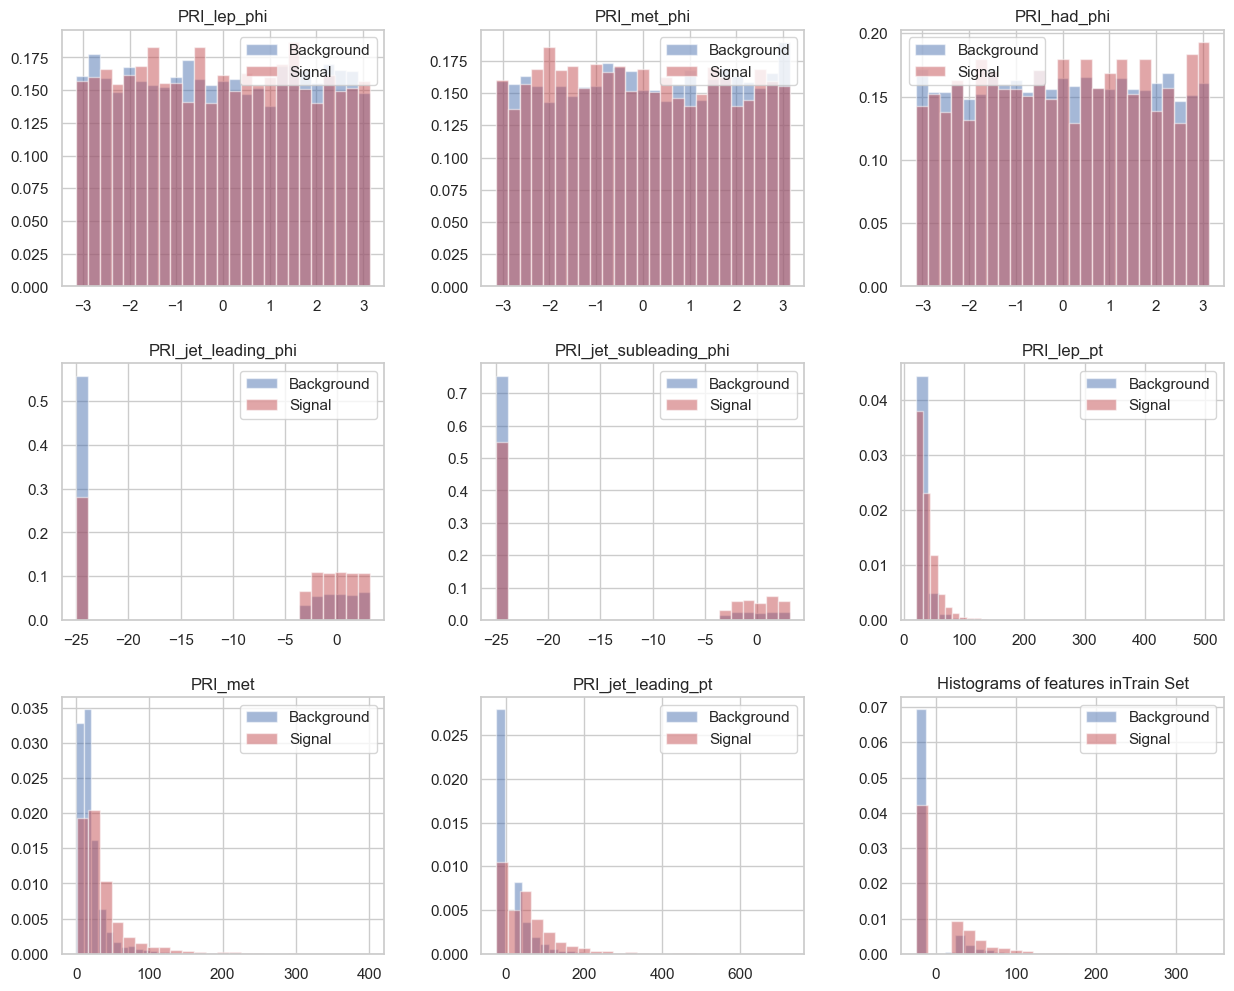

In [12]:
# Show data summary

train_visualize.histogram_dataset()

Signal feature  correlation matrix


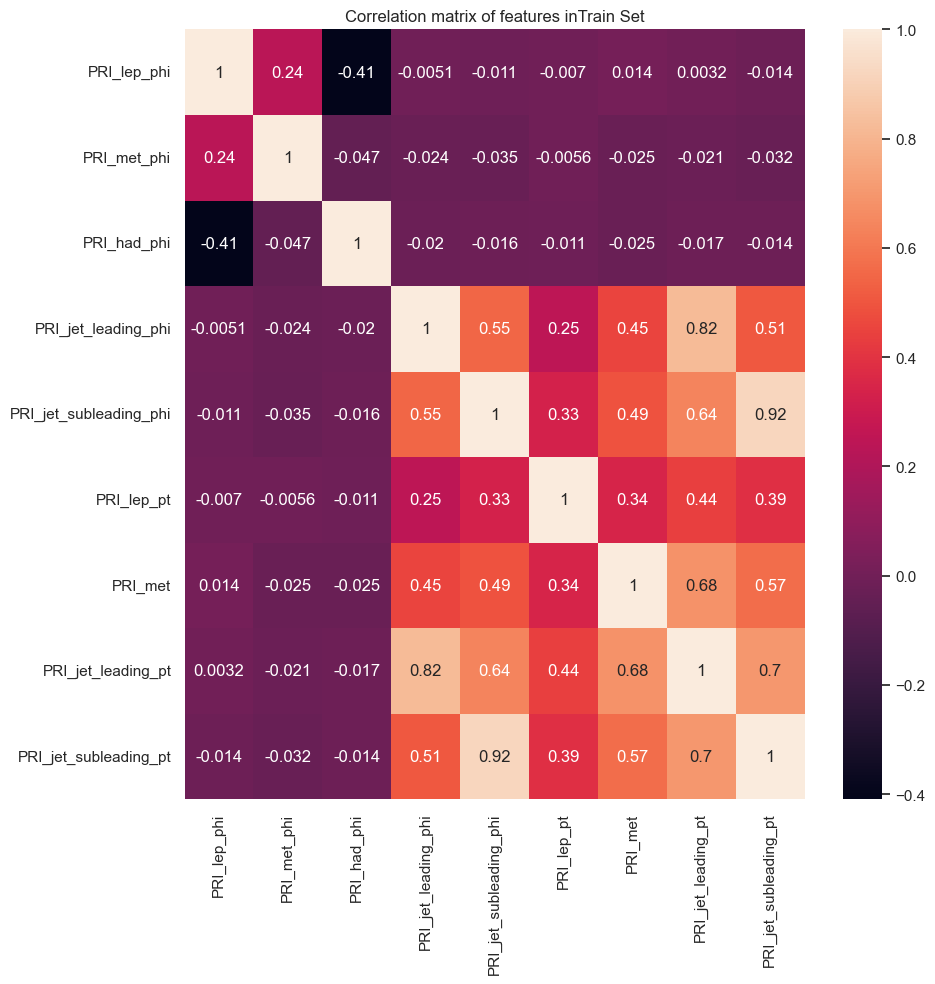

Background feature  correlation matrix


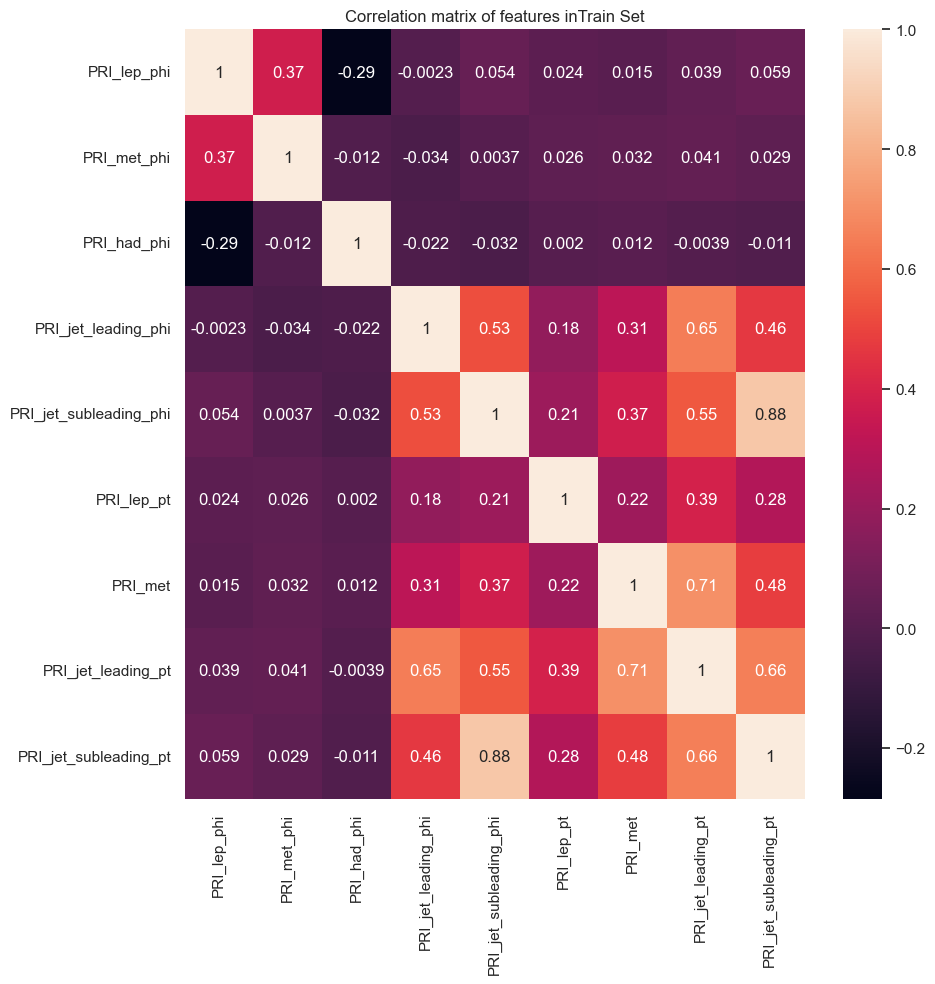

In [13]:
train_visualize.correlation_plots(
    columns=[
        "PRI_lep_phi",
        "PRI_met_phi",
        "PRI_had_phi",
        "PRI_jet_leading_phi",
        "PRI_jet_subleading_phi",
        "PRI_lep_pt",
        "PRI_met",
        "PRI_jet_leading_pt",
        "PRI_jet_subleading_pt",
    ]
)

diboson (28,)
diboson (28,)
htautau (30,)
ttbar (308,)
ttbar (308,)
ztautau (6361,)
ztautau (6361,)


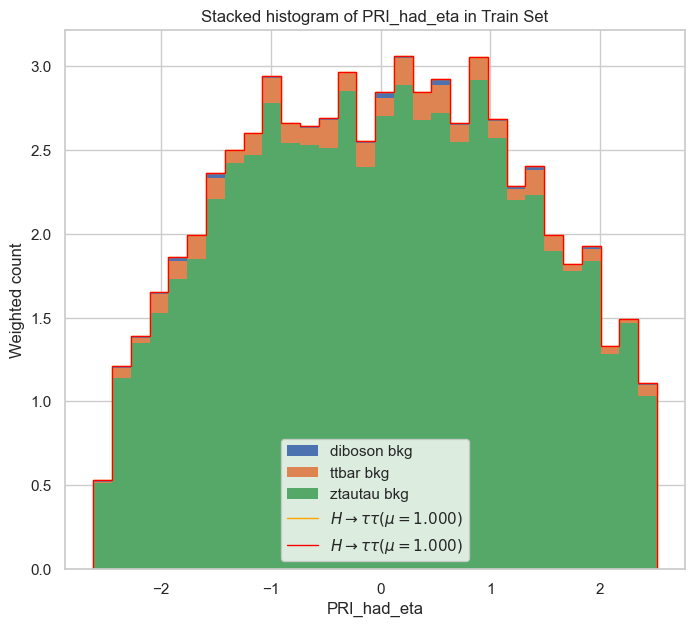

In [14]:
train_visualize.stacked_histogram("PRI_had_eta")

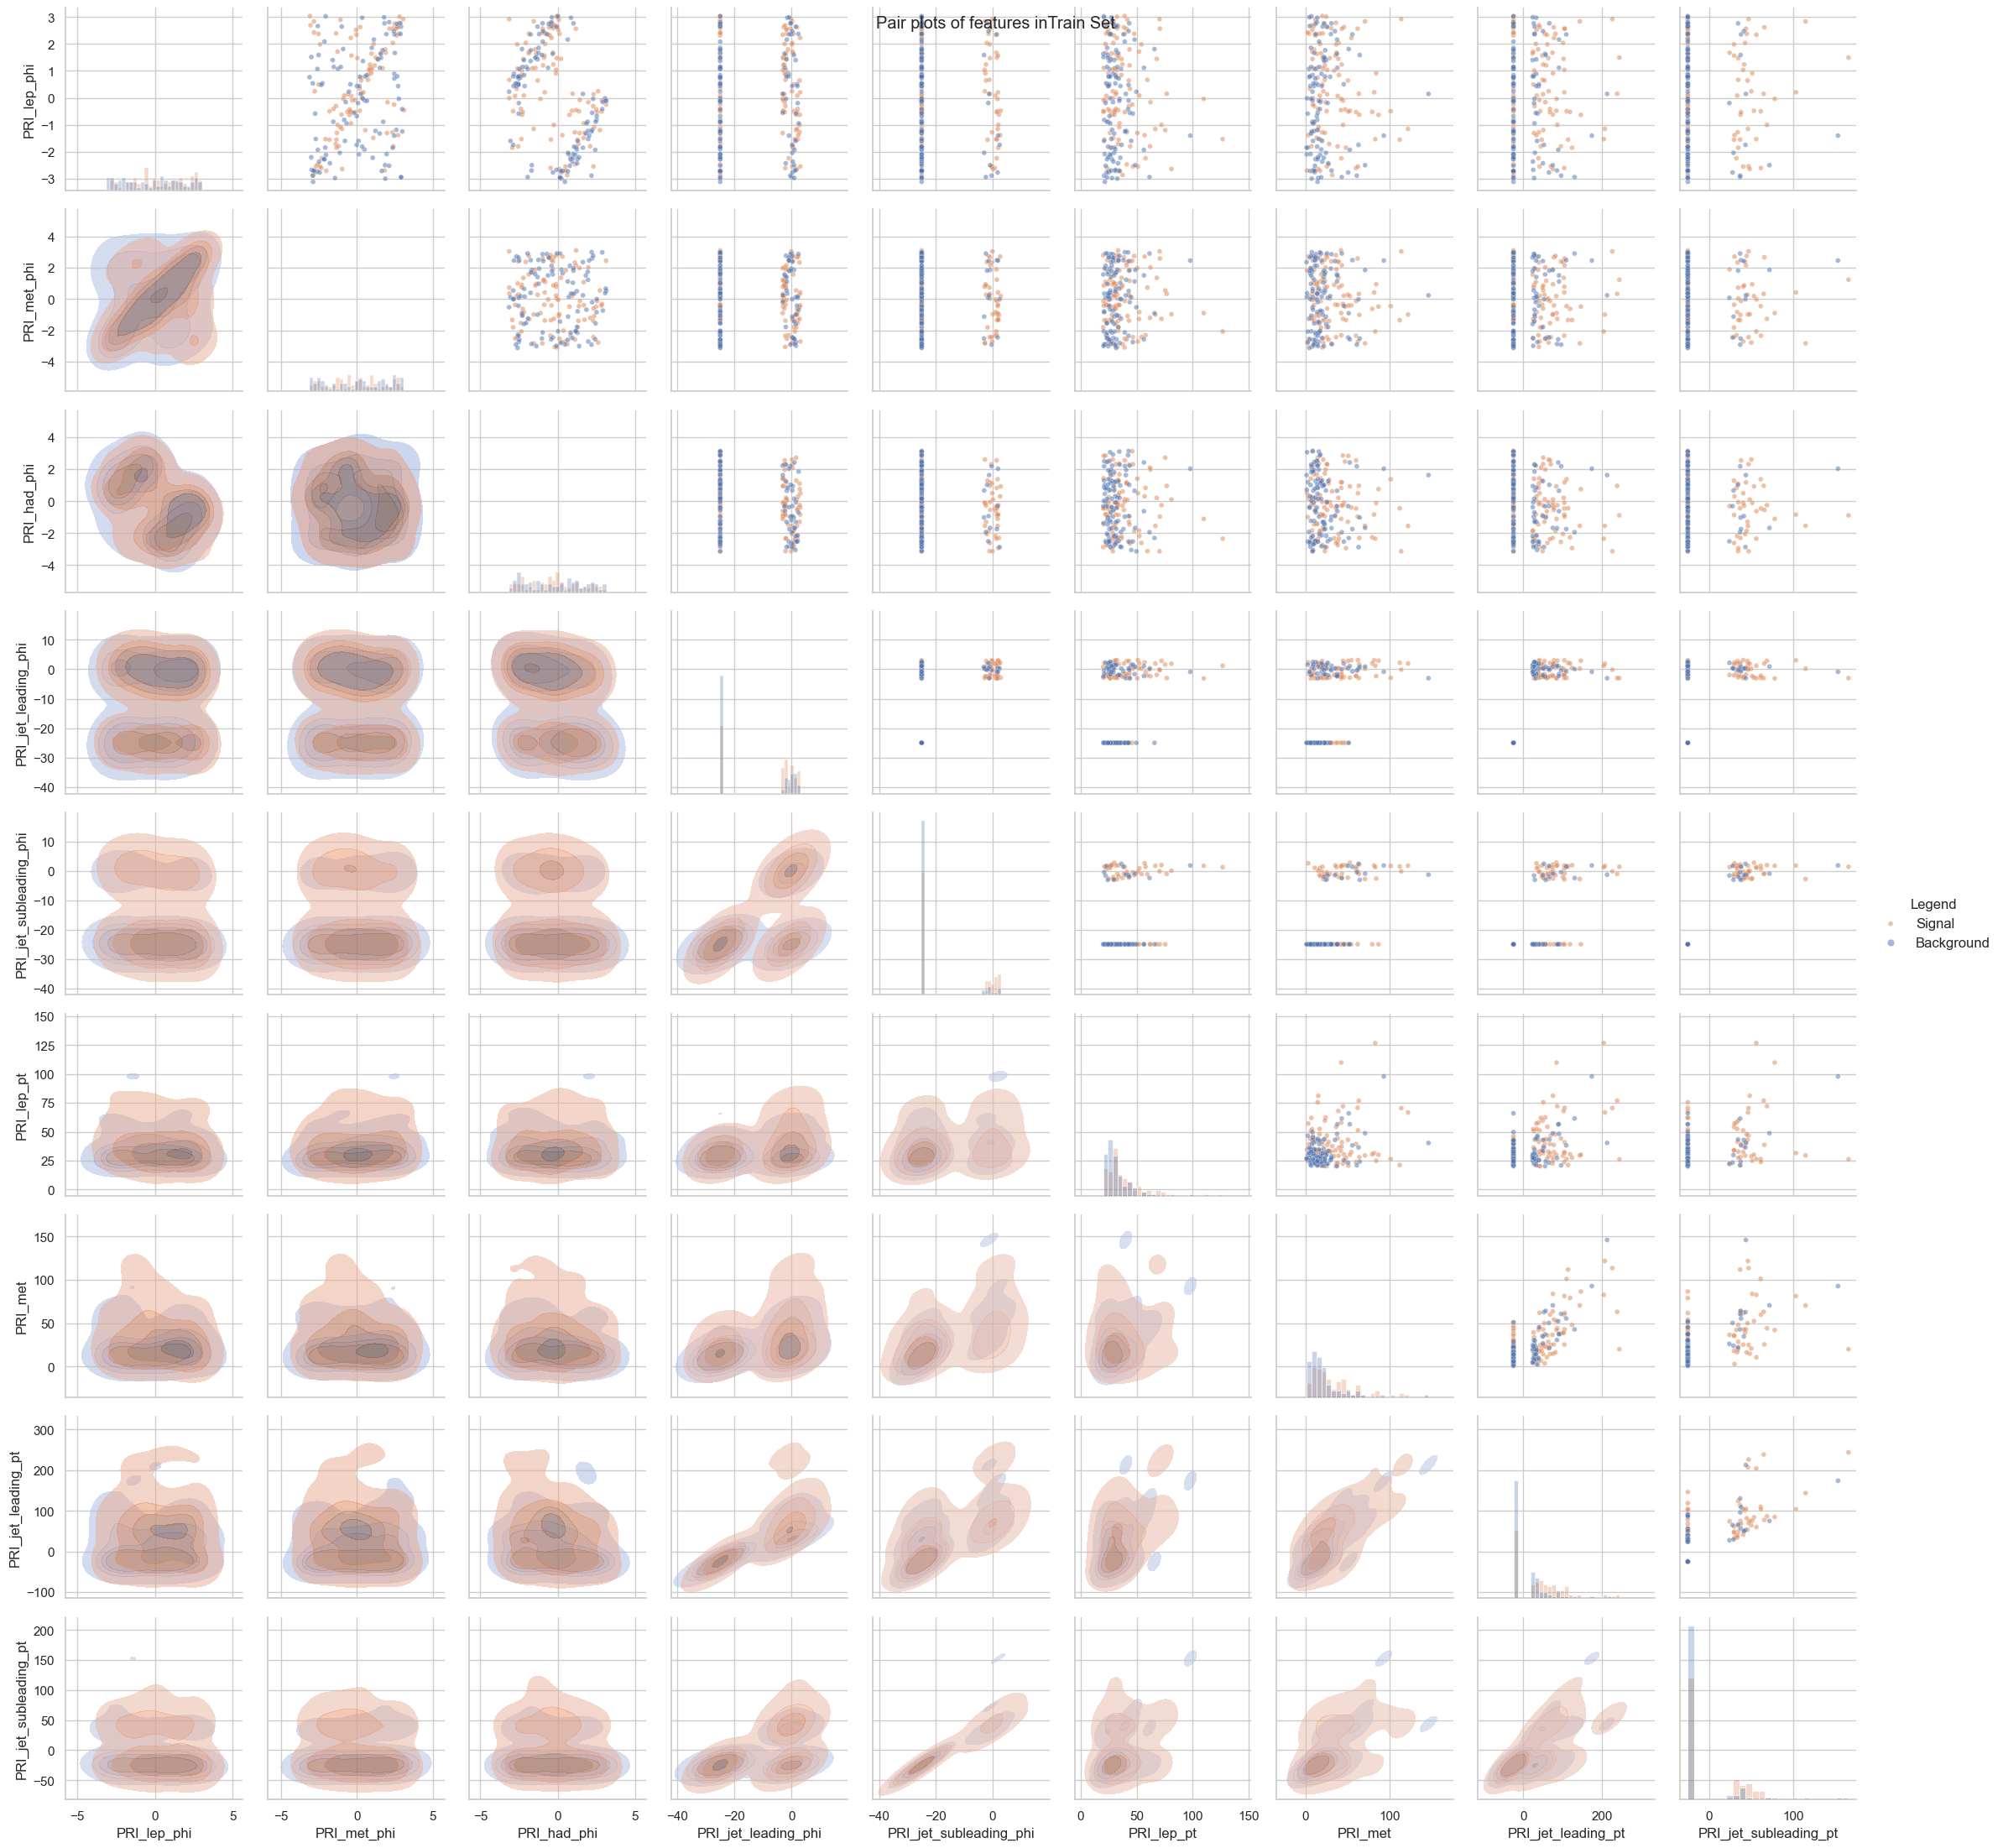

In [15]:
# Show data summary
train_visualize.pair_plots(sample_size=100)

### Test Settings
The Test setting sets the test conditions in ingestion.
This includes what systematics you want and how many psuedo experiments you want. 

In [16]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 10,  # Number of pseudo-experiments to run per set
    "num_of_sets": 2,  # Number of sets of pseudo-experiments to run
}

USE_RANDOM_MUS = True
RANDOM_SEED = 42

In [17]:
test_settings = TEST_SETTINGS.copy()

if USE_RANDOM_MUS:
    random_state = np.random.RandomState(RANDOM_SEED)
    test_settings["ground_truth_mus"] = (
        random_state.uniform(0.1, 3, test_settings["num_of_sets"])
    ).tolist()
    test_settings["random_mu"] = True
    random_settings_file = os.path.join(output_dir, "test_settings.json")
    with open(random_settings_file, "w") as f:
        json.dump(test_settings, f)
else:
    test_settings["ground_truth_mus"] = data.ground_truth_mus


### Ingestion



In [18]:

from HiggsML.ingestion import Ingestion

ingestion = Ingestion(data)


In [19]:

# initialize submission
ingestion.init_submission(Model)

2025-04-02 16:29:45,367 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-04-02 16:29:58,777 - HiggsML.datasets     - INFO     - Sampled train data shape: (50000, 16)
2025-04-02 16:29:58,779 - HiggsML.datasets     - INFO     - Sampled train labels shape: (50000,)
2025-04-02 16:29:58,780 - HiggsML.datasets     - INFO     - Sampled train weights shape: (50000,)
2025-04-02 16:29:58,780 - HiggsML.datasets     - INFO     - Sampled train detailed labels shape: (50000,)
2025-04-02 16:29:58,787 - HiggsML.datasets     - INFO     - Train data loaded successfully
2025-04-02 16:30:14,196 - HiggsML.datasets     - INFO     - Sampled train data shape: (50000, 16)
2025-04-02 16:30:14,198 - HiggsML.datasets     - INFO     - Sampled train labels shape: (50000,)
2025-04-02 16:30:14,199 - HiggsML.datasets     - INFO     - Sampled train weights shape: (50000,)
2025-04-02 16:30:14,200 - HiggsML.datasets     - INFO     - Sampled train detailed labels shape: (50000,)
2025-04-02 16:30:14,20

Training Data:  (50000, 16)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  1019.8560347749982
sum_bkg_weights:  1048068.7624762985

Valid Data:  (50000, 16)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  1011.7735669942828
sum_bkg_weights:  1052193.4873622863

Holdout Data:  (50000, 16)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  1005.358274588177
sum_bkg_weights:  1055468.0295665788
 
 
Training Data:  (50000, 17)
Model is BDT


2025-04-02 16:30:27,540 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model


score shape before threshold (50000,)
score shape after threshold (50000,)
saved_info {'beta': 203740.34349977027, 'gamma': 717.7114591145053}
Train Results: 
	 mu_hat  :  -100.77060467474386
	 del_mu_stat  :  0.6300169475102058
	 del_mu_sys  :  10.077060467474388
	 del_mu_tot  :  10.096735562511538
Holdout Results: 
	 mu_hat  :  1.0000000000000433
	 del_mu_stat  :  0.6300169475102058
	 del_mu_sys  :  0.10000000000000434
	 del_mu_tot  :  0.637903875321414
Valid Results: 
	 mu_hat  :  -1.7850419458119093
	 del_mu_stat  :  0.6300169475102058
	 del_mu_sys  :  0.17850419458119093
	 del_mu_tot  :  0.6548168458684894
[*] --- Dataset name : Train Set
[*] --- Number of events : 50000
[*] --- Number of features : 18
   diboson   3792.967268076941
   htautau   1011.7735669942828
   ttbar   43339.67401554843
   ztautau   1005060.8460786609
[*] --- Number of signal events : 16494
[*] --- Number of background events : 33506
[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_n_jets,PRI_jet_all_pt,PRI_met,PRI_met_phi,derived_feature,score
0,25.115999,-0.228,2.889,29.495001,-0.430,-0.399,-25.000,-25.000,-25.000,-25.0,-25.0,-25.0,0.0,0.000,8.238,-2.773,54.611000,0.110985
1,41.869999,-0.568,-1.377,27.341999,-1.711,1.580,-25.000,-25.000,-25.000,-25.0,-25.0,-25.0,0.0,0.000,10.973,2.137,69.211998,0.357613
2,26.243000,0.275,-2.110,41.277000,-0.884,0.707,31.535,2.589,-3.034,-25.0,-25.0,-25.0,1.0,31.535,4.603,2.615,67.520004,0.458520
3,21.997000,-1.149,0.581,35.450001,-1.649,-2.746,-25.000,-25.000,-25.000,-25.0,-25.0,-25.0,0.0,0.000,2.842,0.624,57.446999,0.140698
4,26.632000,1.269,1.896,48.944000,1.707,-1.196,-25.000,-25.000,-25.000,-25.0,-25.0,-25.0,0.0,0.000,7.859,-2.672,75.576004,0.218278


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_n_jets,PRI_jet_all_pt,PRI_met,PRI_met_phi,derived_feature,score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.024986,-0.000600,0.013258,43.069866,0.000552,-0.006357,20.243565,-13.196897,-13.190198,-8.562950,-19.454041,-19.458042,0.844120,50.076015,24.728600,0.000150,77.094856,0.415637
std,18.250368,1.221657,1.813497,21.068630,1.248771,1.808102,62.922802,12.546584,12.544345,34.349682,10.443573,10.419625,1.162312,89.662437,27.644918,1.813928,30.524702,0.299737
min,20.000999,-2.500000,-3.141000,22.997000,-2.629000,-3.142000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,0.005000,-3.141000,43.237000,0.001910
25%,23.934000,-0.948000,-1.556000,30.737000,-0.981000,-1.568000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,9.649750,-1.578000,59.732752,0.152475
50%,28.982000,-0.005000,0.019500,38.166000,0.006000,-0.022000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,-25.000000,0.000000,0.000000,16.748500,0.012000,69.498501,0.318387
75%,37.125999,0.947000,1.589250,48.211249,0.976000,1.546250,47.151751,-0.177000,-0.171000,-25.000000,-25.000000,-25.000000,1.000000,63.779750,28.644749,1.571000,84.018755,0.692990
max,407.841003,2.500000,3.142000,641.158997,2.654000,3.141000,935.098999,4.903000,3.141000,768.370972,4.837000,3.140000,9.000000,2054.429932,531.411987,3.141000,816.989014,0.999545


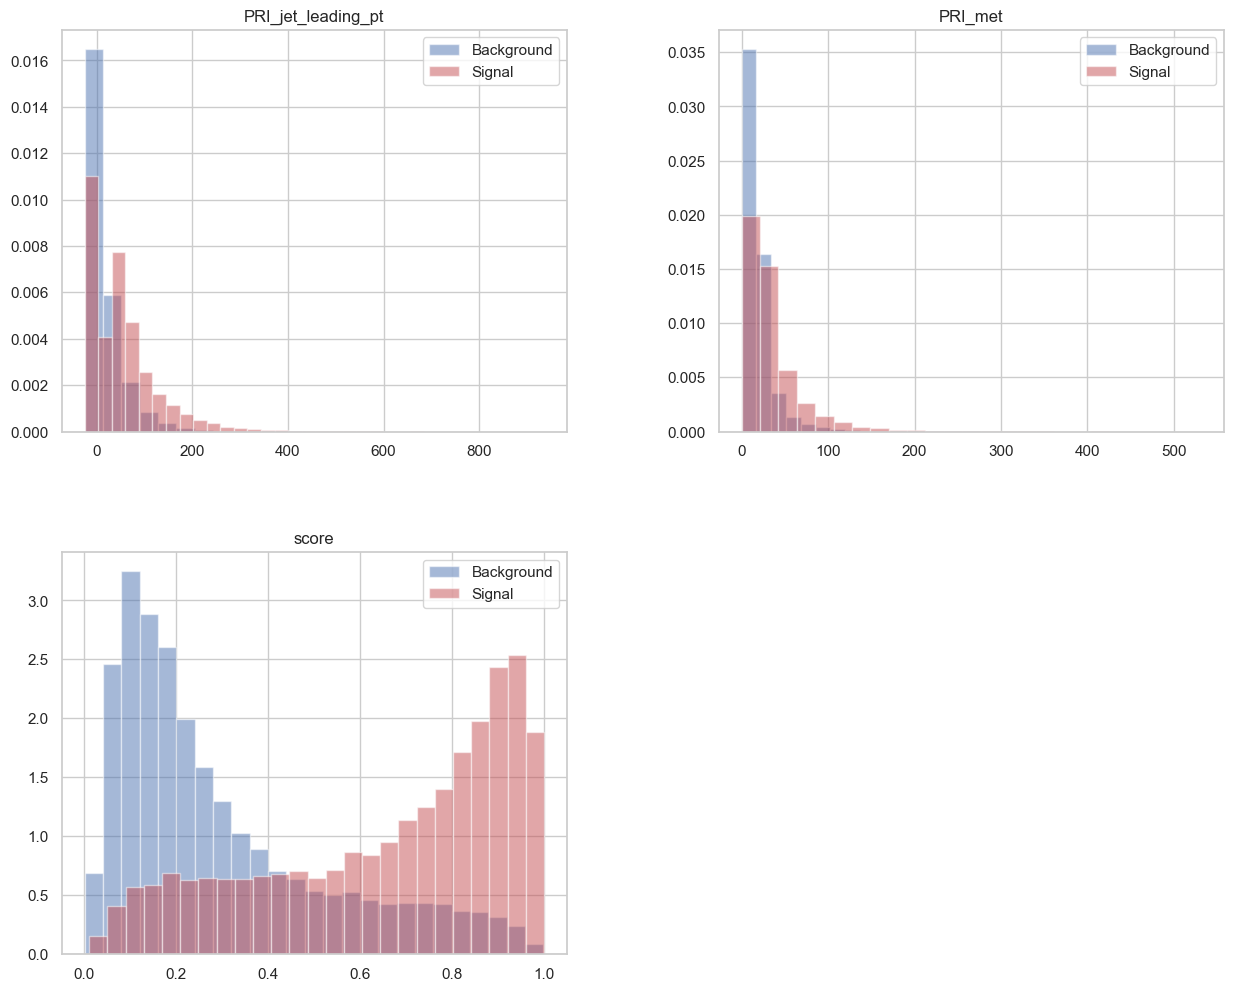

diboson (121,)
diboson (121,)
htautau (30,)
ttbar (1380,)
ttbar (1380,)
ztautau (32005,)
ztautau (32005,)


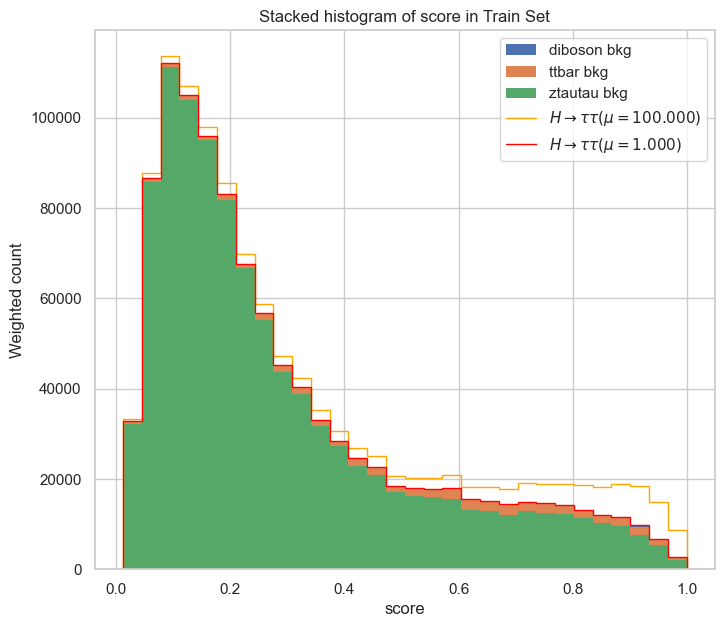

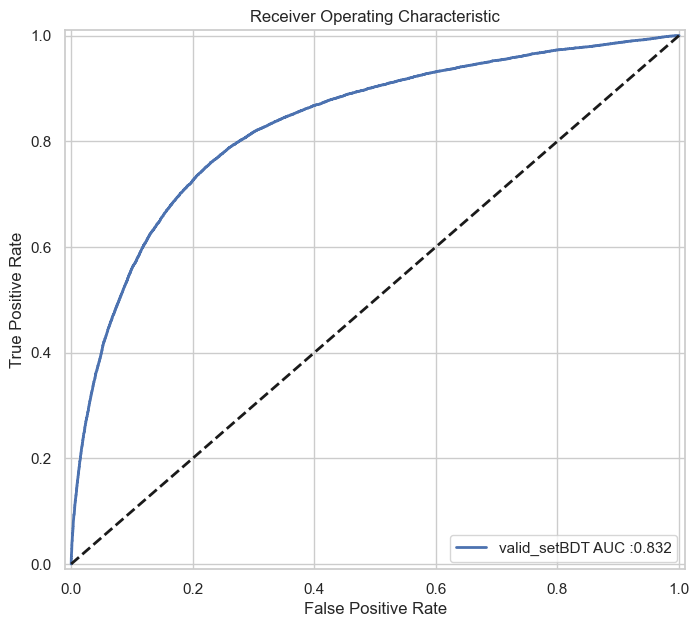

In [20]:

# fit submission
ingestion.fit_submission()

In [21]:

# load test set
data.load_test_set()

2025-04-02 16:30:44,549 - HiggsML.datasets     - INFO     - Test data loaded successfully


In [22]:

# predict submission
ingestion.predict_submission(test_settings)

2025-04-02 16:30:44,569 - HiggsML.ingestion    - INFO     - Calling predict method of submitted model with seed: 31415


Test Results:  {'mu_hat': -17.496367572649895, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.7496367572649896, 'del_mu_tot': 1.8596102109105623}
Test Results:  {'mu_hat': -18.893865114680892, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.8893865114680892, 'del_mu_tot': 1.9916582899352069}
Test Results:  {'mu_hat': -20.117197958053985, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 2.0117197958053987, 'del_mu_tot': 2.108064963653965}
Test Results:  {'mu_hat': -19.60306376761586, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.9603063767615863, 'del_mu_tot': 2.059058630763635}
Test Results:  {'mu_hat': -17.40580192934779, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.7405801929347788, 'del_mu_tot': 1.8510917757331615}
Test Results:  {'mu_hat': -18.317031632725925, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.8317031632725926, 'del_mu_tot': 1.9370229302961024}
Test Results:  {'mu_hat': -17.699791940682324, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.769979

In [23]:
ingestion.process_results_dict()

In [24]:

# save result
ingestion.save_result(output_dir)


## Score
1. Compute Scores
2. Visualize Scores


In [25]:
from HiggsML.score import Scoring

In [26]:
# Initialize Score
score = Scoring()

In [27]:
print(output_dir)
score.load_ingestion_results(prediction_dir = output_dir, score_dir = output_dir)

2025-04-02 16:32:24,328 - HiggsML.score        - INFO     - Read ingestion results from /home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission


/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission


2025-04-02 16:32:24,362 - HiggsML.score        - INFO     - Computing scores


[✔]


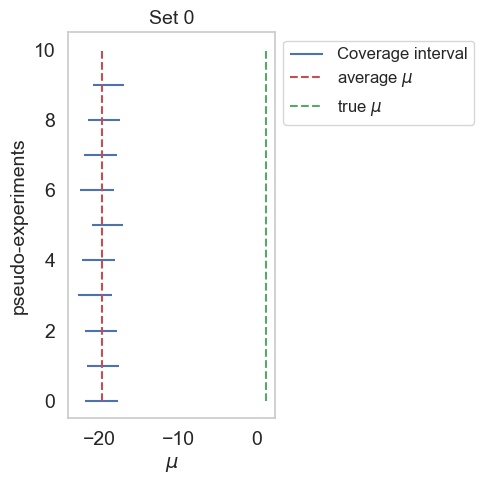

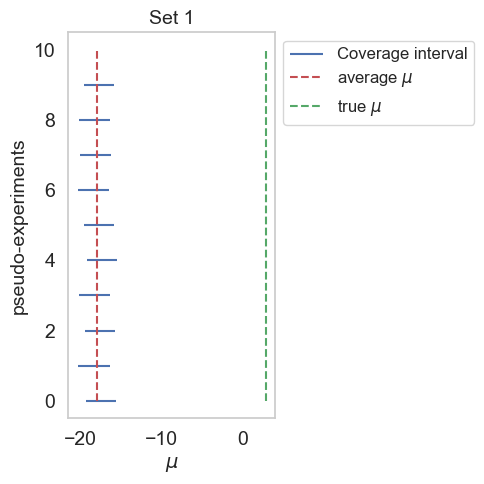

In [28]:
# Compute Score
score.compute_scores(test_settings)


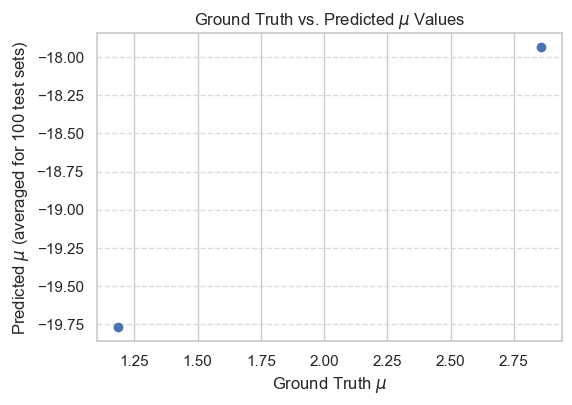

In [29]:
# Visualize scatter plot of ground truth mu and predicted mu
visualization.visualize_scatter(ingestion_result_dict=ingestion.results_dict, 
                  ground_truth_mus=test_settings["ground_truth_mus"])

## Submissions

In [30]:
from zipfile import ZipFile, ZIP_DEFLATED
from contextlib import closing
# -------------------------------------
# Zip files
# -------------------------------------
def zipdir(archivename, basedir):
    '''Zip directory, from J.F. Sebastian http://stackoverflow.com/'''
    assert os.path.isdir(basedir)
    with closing(ZipFile(archivename, "w", ZIP_DEFLATED)) as z:
        for root, dirs, files in os.walk(basedir):
            # NOTE: ignore empty directories
            for fn in files:
                if fn[-4:] != '.zip' and fn != '.DS_Store':
                    absfn = os.path.join(root, fn)
                    zfn = absfn[len(basedir):]  # XXX: relative path
                    z.write(absfn, zfn)

### **Prepare the submission**

In [31]:
import datetime
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
code_submission = 'BlackSwan-code_submission_' + the_date + '.zip'
zipdir(code_submission, submission_dir)
print("Submit : " + code_submission + " to the competition")


Submit : BlackSwan-code_submission_25-04-02-16-32.zip to the competition


In [32]:
!python3 -m HiggsML.score --prediction $output_dir --output $output_dir

############################################
### Scoring Program
############################################

/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission/test_settings.json
2025-04-02 16:32:27,928 - HiggsML.score        - INFO     - Reading ingestion duration from /home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission/ingestion_duration.json
2025-04-02 16:32:27,928 - HiggsML.score        - WARNING  - File /home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission/ingestion_duration.json not found. Setting ingestion duration to 0.
/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission
2025-04-02 16:32:27,929 - HiggsML.score        - INFO     - Read ingestion results from /home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission
2025-04-02 16:32:27,929 - HiggsML.score        - INFO     - Computing scores
[✔]
2025-04-02 16:32:29,570 - HiggsML.score        - INFO     - Writing scores to /home/chakkappai/Work/ST